In [1]:
# define relevants paths and load functions and libraries

%run Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'paper_code\\Datasets\\' # your data path
saving_path = 'paper_code\\Figures_output\\' # your saving figures path

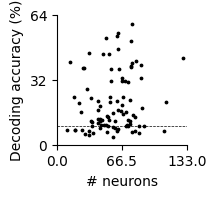

In [3]:
#  plot accuracy decoder of individual recordings vs number of neurons in the recording - Fig 7A

load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM.npy'])
all_results = np.load(load_dir)
mean_results= np.mean(all_results[:,:],axis=1) # invidual recording results

load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM_numberN.npy'])
number_neurons = np.load(load_dir) 

fig, ax = plt.subplots(figsize=(1.3,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)
max_acc = np.round(np.nanmax(mean_results))+4
max_n = np.round(np.nanmax(number_neurons))+4

ax.scatter(number_neurons,mean_results[:,0],s=3,color='k')
ax.set_xlabel('# neurons',fontsize = 10)
ax.set_ylabel('Decoding accuracy (%)',fontsize = 10)
ax.axhline(y=1/11*100, color='k', linestyle='--',linewidth=0.5)
ax.set_ylim([0,max_acc])
ax.set_yticks([0,max_acc/2,max_acc])
ax.set_xlim([0,max_n])
ax.set_xticks([0,max_n/2,max_n])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure7A.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


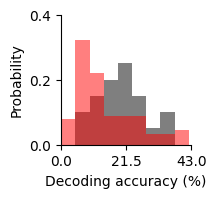

In [6]:
#  plot accuracy decoder of individual recordings vs accuracy with all recordings together - Fig 7B

n_neurons = 25

load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM_25N.npy'])
all_results_ind = np.load(load_dir)

load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_all_neurons_SVM.npy'])
all_results_all = np.load(load_dir) 
all_results_all= all_results_all[:,n_neurons]

dims = (1, 1)
fig, this_ax = plt.subplots(*dims, figsize=(1.3, 1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

all_results_ind2 = np.nanmean(all_results_ind[:,:],axis=1) 
max_acc = np.array([np.nanmax(all_results_ind2),np.nanmax(all_results_all)]).max()
bins = np.arange(0, max_acc, max_acc/10)
sns.histplot(data=all_results_all, kde=False, stat='probability', color='black',edgecolor='None', alpha=0.5,ax=this_ax, bins=bins,linewidth=1.5)

sns.histplot(data=all_results_ind2[:,0], kde=False, stat='probability', color='red', alpha=0.5,edgecolor='None',ax=this_ax, bins=bins,linewidth=1.5)
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)
this_ax.set_xlabel('Decoding accuracy (%)',fontsize=10)
this_ax.set_ylabel('Probability',fontsize=10)
this_ax.set_ylim([0,0.4])
this_ax.set_yticks([0,0.2,0.4])
this_ax.set_xlim([0,np.ceil(bins[-1])])
this_ax.set_xticks([0,np.ceil(bins[-1])/2,np.ceil(bins[-1])])

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure7B.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


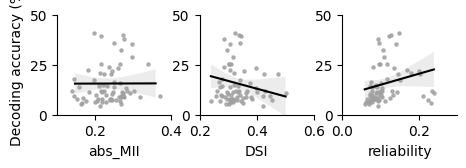

In [7]:
#  plot fit of decoding accuracy based on percentage of neurons from different subpopulations - Fig 7C,D,E

# load the dataframe created 
file_path = ''.join([data_path,f'decoder_datasets\\data_all_mean_25n.csv']) 
df = pd.read_csv(file_path)
# Define filenames and corresponding df attributes
files = [
    (''.join([data_path,'decoder_datasets\\accuracy_prediction_results_absMII.mat']), 'abs_MII'),
    (''.join([data_path,'decoder_datasets\\accuracy_prediction_results_FRmod.mat']), 'DSI'),
    (''.join([data_path,'decoder_datasets\\accuracy_prediction_results_RI.mat']), 'reliability')
]

xlimits = [[0.1,0.4],[0.2,0.6],[0,0.3]]
# Load data dynamically into lists
ypred_list, yCI_list, X_list = [], [], []

for file, _ in files:
    data = scipy.io.loadmat(file, struct_as_record=False, squeeze_me=True)
    ypred_list.append(data['ypred'])
    yCI_list.append(data['yCI'])
    X_list.append(data['n_delay'])

# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(4, 1))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0.25)

# Common variable
var2 = df.accuracy  

# Iterate through datasets and subplots dynamically
for i, (_, df_attr) in enumerate(files):
    var1 = getattr(df, df_attr)  # Dynamically access the df attribute
    var3 = X_list[i]
    var4 = ypred_list[i]
    var5 = yCI_list[i]

    this_ax = axs[i]

    # Scatter plot
    sns.regplot(x=var1, y=var2, scatter_kws={"color": '#A0A0A0', 's': 5}, fit_reg=False, ax=this_ax)

    # Regression line and confidence interval
    this_ax.plot(var3, var4, 'k')
    this_ax.fill_between(var3, var5[:, 0], var5[:, 1], color='#A0A0A0', alpha=0.2, edgecolor='none')

    # Formatting
    this_ax.spines.right.set_visible(False)
    this_ax.spines.top.set_visible(False)
    this_ax.set_ylim([0, 50])
    this_ax.set_yticks([0, 25, 50])
    
    this_ax.set_xlim(xlimits[i])
    this_ax.set_ylabel('Decoding accuracy (%)' if i == 0 else '', fontsize=10)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure7C_D_E.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)
